In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from anomaly.utils import specobjid_to_idx

In [3]:
# load data
user = "/home/edgar/"
work = f"{user}/sdss"
data_directory = f"{user}/spectra/0_01_z_0_5_4_0_snr_inf"
spectra = np.load(f"{data_directory}/spectra.npy", mmap_mode="r")
wave = np.load(f"{data_directory}/wave.npy")
idx_specobjid = np.load(f"{data_directory}/ids_inputting.npy")

In [4]:
# load metadata
sdss_df = pd.read_csv(
    f"{data_directory}/drop_0_01_z_0_5_4_0_snr_inf.csv.gz",
    index_col="specobjid",
)
sdss_df.shape

(724851, 21)

count    724851.000000
mean         14.709496
std           7.034626
min           4.000678
25%           9.975084
50%          13.175450
75%          17.569555
max          98.104000
Name: snMedian, dtype: float64

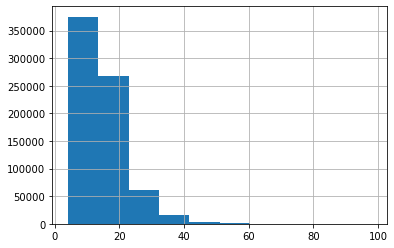

In [5]:
sdss_df["snMedian"].hist()

sdss_df["snMedian"].describe()

543636 724848 724851


count    181212.000000
mean         24.250586
std           6.738284
min          17.569510
25%          19.414960
50%          22.109470
75%          26.882280
max          92.638030
Name: snMedian, dtype: float64

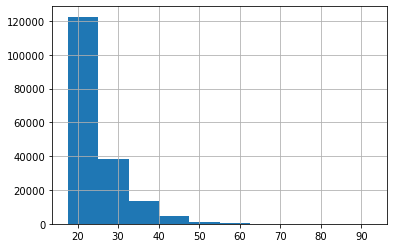

In [16]:
# check bin distribution
n = 3
n_spectra = sdss_df.shape[0] // 4
print(n * n_spectra, (n + 1) * n_spectra, sdss_df.shape[0])

sdss_df.sort_values(by=["snMedian"], inplace=True)
sdss_df.iloc[n * n_spectra : (n + 1) * n_spectra]["snMedian"].hist()
sdss_df.iloc[n * n_spectra : (n + 1) * n_spectra]["snMedian"].describe()

543636 724848 724851


count    181212.000000
mean          0.080088
std           0.037015
min           0.010013
25%           0.052618
50%           0.076345
75%           0.103343
max           0.287933
Name: z, dtype: float64

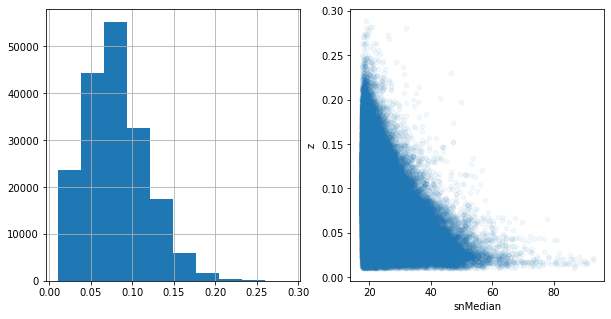

In [57]:
# check z distribution per SNR bin
n = 3
n_spectra = sdss_df.shape[0] // 4
print(n * n_spectra, (n + 1) * n_spectra, sdss_df.shape[0])

sdss_df.sort_values(by=["snMedian"], inplace=True)
# snr = sdss_df.iloc[n*n_spectra:(n+1)*n_spectra]["snMedian"].to_numpy()
# snr = sdss_df.iloc[n*n_spectra:(n+1)*n_spectra]["snMedian"].to_numpy()
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sdss_df.iloc[n * n_spectra : (n + 1) * n_spectra]["z"].hist(ax=axs[0])
sdss_df.iloc[n * n_spectra : (n + 1) * n_spectra].plot.scatter(
    y="z", x="snMedian", ax=axs[1], alpha=0.05
)
sdss_df.iloc[n * n_spectra : (n + 1) * n_spectra]["z"].describe()

Explore spectra with small median SNR

40.94565


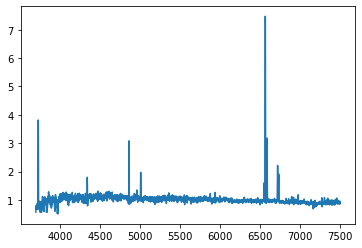

In [38]:
idx = 719101
print(sdss_df.iloc[idx]["snMedian"])
idx_spectrum = specobjid_to_idx(sdss_df.index[idx], idx_specobjid)
plt.plot(wave, spectra[idx_spectrum])

In [56]:
# number of spectra according to a SNR threshold
mask_large_snr = sdss_df["snMedian"].values > 40
np.sum(mask_large_snr)

6654

count    665479.000000
mean         13.180727
std           4.628262
min           4.000678
25%           9.698583
50%          12.635040
75%          16.194910
max          24.999860
Name: snMedian, dtype: float64

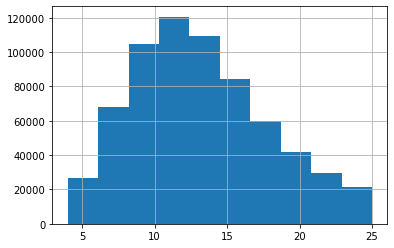

In [10]:
sdss_df.loc[~mask_large_snr, "snMedian"].hist()
sdss_df.loc[~mask_large_snr, "snMedian"].describe()

In [11]:
df = sdss_df.loc[~mask_large_snr].copy()

In [12]:
# explore stats of new bins
n_spectra = 150_000
n_bin = 4
df.iloc[n_bin * n_spectra : (n_bin + 1) * n_spectra]["snMedian"].describe()

count    65479.000000
mean        22.156144
std          1.432555
min         19.973590
25%         20.897910
50%         21.994840
75%         23.330250
max         24.999860
Name: snMedian, dtype: float64

Explore old SNR bin selection

In [13]:
specobjid_04 = np.load(f"{data_directory}/bin_04/bin_04_index_specobjid.npy")
sdss_df.loc[specobjid_04[:, 1], "snMedian"].hist()
sdss_df.loc[specobjid_04[:, 1], "snMedian"].describe()

FileNotFoundError: [Errno 2] No such file or directory: '/home/edgar//spectra/0_01_z_0_5_4_0_snr_inf/bin_04/bin_04_index_specobjid.npy'

In [14]:
mask_large_snr_04 = sdss_df.loc[specobjid_04[:, 1], "snMedian"].values > 28
np.sum(mask_large_snr_04)

NameError: name 'specobjid_04' is not defined

In [55]:
sdss_df.loc[specobjid_04[:, 1], "snMedian"]

specobjid
1386119995116775424    18.99335
2420774760452483072    18.99341
1089965158534506496    18.99348
837832845933176832     18.99357
1788018162252408832    18.99363
                         ...   
1874773753037088768    89.63552
1874695412833609728    89.71014
1874775677182437376    90.41394
1874654181147568128    90.70859
1874776226938251264    90.91905
Name: snMedian, Length: 144827, dtype: float64

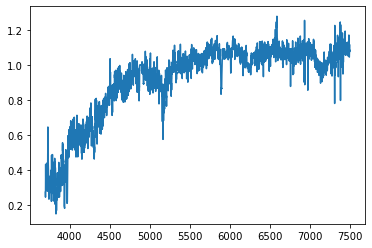

In [70]:
idx_spectrum = specobjid_to_idx(
    sdss_df.loc[specobjid_04[:, 1]].index[-100000], idx_specobjid
)
plt.plot(wave, spectra[idx_spectrum])

In [69]:
sdss_df.loc[specobjid_04[:, 1], "snMedian"].iloc[-100000]

21.42426

In [1]:
a = "023:12:07.4"
b = "3:13:07.3"
c = "-5:13:07.3"

In [5]:
x, y, z = [float(number) for number in c.split(":")]
x, y, z

(-5.0, 13.0, 7.3)

In [1]:
724851 // 3

241617